In [62]:
from osgeo import gdal
import matplotlib.pyplot as plt
import rasterio 
from rasterio.plot import show
import geopandas as gpd
from rasterio.windows import Window


## Opening the big geotiff file via the window function ( first trial) 

In [76]:
with rasterio.open("DHMVIIDSMRAS1m_k13.tif") as src:
    print(src.shape)
window = (width,height)

width = 32000
height = 20000
w = src.read(1, window=Window,(width/2, height/2 , width/7, height/7))
print(w.shape)
# rasterio.plot.show(w, cmap='terarain')

SyntaxError: positional argument follows keyword argument (<ipython-input-76-554f22d51152>, line 7)

##Second trial

In [ ]:
from rasterio.windows import Window

In [2]:
dataset = gdal.Open('DHMVIIDSMRAS1m_k13.tif', gdal.GA_ReadOnly) 
# # Note GetRasterBand() takes band no. starting from 1 not 0
band = dataset.GetRasterBand(1)
arr = band.ReadAsArray()
# plt.imshow(arr)

In [ ]:
fp = r'DHMVIIDSMRAS1m_k13.tif'
img = rasterio.open(fp)
show(img)

In [ ]:

import numpy as np
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling

dst_crs = 'EPSG:4326'

with rasterio.open('DHMVIIDSMRAS1m_k13.tif') as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rasterio.open('DHMVIIDSMRAS1m_k13.tif', 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest)


In [ ]:
fp = r'DHMVIIDSMRAS1m_k13.tif'
img = rasterio.open(fp)
show(img)

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio
from rasterio.plot import show
from osgeo import gdal
import os
import pandas as pd
import numpy as np

In [79]:
PointData = gpd.read_file('Dsm13/DHMVII_vdc_k13.shp')
print(PointData.all)
PointData.head()
# PointData.plot()

<bound method DataFrame.all of         Date   OpnDatum1   OpnDatum2  \
0   20150305  2015-03-05        None   
1   20150306  2015-03-06        None   
2   20150308  2015-03-08        None   
3   20150310  2015-03-10        None   
4   20150311  2015-03-11        None   
5   20150312  2015-03-12        None   
6   20150306  2015-03-05  2015-03-06   
7   20150308  2015-03-06  2015-03-08   
8   20150308  2015-03-08  2015-03-10   
9   20150311  2015-03-10  2015-03-11   
10  20150312  2015-03-11  2015-03-12   
11  20150313  2015-03-12  2015-03-13   

                                             geometry  
0   POLYGON Z ((98000.000 217783.121 0.000, 97997....  
1   POLYGON Z ((98000.000 217465.109 0.000, 98000....  
2   POLYGON Z ((98000.000 213046.450 0.000, 98000....  
3   POLYGON Z ((98000.000 209075.241 0.000, 98000....  
4   POLYGON Z ((98000.000 204542.782 0.000, 98000....  
5   POLYGON Z ((98000.000 200890.510 0.000, 98000....  
6   POLYGON Z ((98000.000 217783.121 0.000, 98000....  


,Date,OpnDatum1,OpnDatum2,geometry
0,20150305,2015-03-05,None,"POLYGON Z ((98000.000 217783.121 0.000, 97997...."
1,20150306,2015-03-06,None,"POLYGON Z ((98000.000 217465.109 0.000, 98000...."
2,20150308,2015-03-08,None,"POLYGON Z ((98000.000 213046.450 0.000, 98000...."
3,20150310,2015-03-10,None,"POLYGON Z ((98000.000 209075.241 0.000, 98000...."
4,20150311,2015-03-11,None,"POLYGON Z ((98000.000 204542.782 0.000, 98000...."


In [88]:
info_options = gdal.InfoOptions(computeMinMax=True, stats=True)
print(gdal.Info)

<function Info at 0x000001C78DFC91F8>


In [81]:
TiffRaster = rasterio.open('DHMVIIDTMRAS1m_k13.tif')

#open raster file
print(TiffRaster.crs)
print(TiffRaster.count)
print(TiffRaster.head)

EPSG:31370
1


AttributeError: 'DatasetReader' object has no attribute 'head'

<AxesSubplot:>

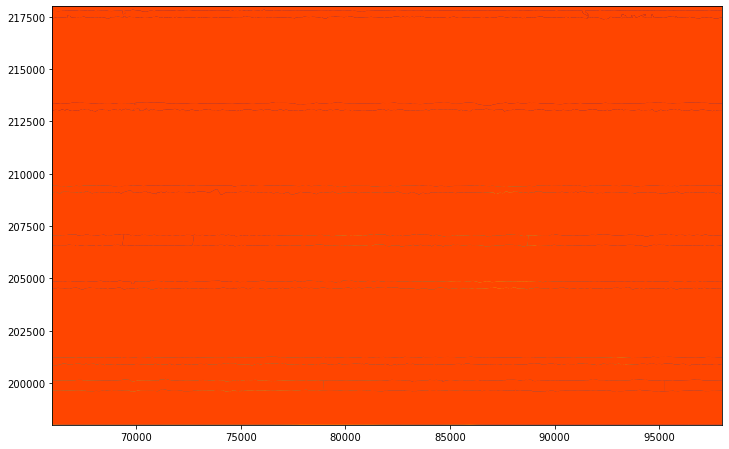

In [21]:
#show point and raster on a matplotlib plot
fig, ax = plt.subplots(figsize=(12,12))
PointData.plot(ax=ax, color='orangered')
show(TiffRaster, ax=ax)

In [27]:
#extract xy from point geometry
for point in TiffRaster ['geometry']:
    print(point.xy[0][0],point.xy[1][0])

TypeError: 'DatasetReader' object is not subscriptable

In [32]:
image = gdal.Open('DHMVIIDSMRAS1m_k13.tif',GA_ReadOnly)
band = dataset.GetRasterband(1)
arr = band.ReadAsArray()
plt.imshow(arr)


NameError: name 'GA_ReadOnly' is not defined

In [17]:
img =image.GetRasterBand(1)
img.GetStatistics( True, True )

[0.0, 0.0, 0.0, 0.0]

In [18]:
from shapely.geometry import MultiPoint
print (MultiPoint.bounds)

9.0

In [20]:
import rasterio
from rasterio.enums import Resampling

upscale_factor = 2

    

In [ ]:
with rasterio.open('DHMVIIDSMRAS1m_k13.tif') as dataset:

    # resample data to target shape
    data = dataset.read(out_shape=(dataset.count,
            int(dataset.height * upscale_factor),
            int(dataset.width * upscale_factor)
        ),
        resampling=Resampling.bilinear
    )

    # scale image transform
    transform = dataset.transform * dataset.transform.scale(
        (dataset.width / data.shape[-1]),
        (dataset.height / data.shape[-2]))

In [21]:
import georasters as g